In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [28]:
file_path = 'c:/Users/gregp/Desktop/bank.csv'

In [30]:
data = pd.read_csv('c:/Users/gregp/Desktop/bank.csv',delimiter=";")

# Display basic information about the Dataset

In [31]:
bank_data_info = data.info()
bank_data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [32]:
bank_data_info, data

(None,
       age            job  marital  education default  balance housing loan  \
 0      30     unemployed  married    primary      no     1787      no   no   
 1      33       services  married  secondary      no     4789     yes  yes   
 2      35     management   single   tertiary      no     1350     yes   no   
 3      30     management  married   tertiary      no     1476     yes  yes   
 4      59    blue-collar  married  secondary      no        0     yes   no   
 ...   ...            ...      ...        ...     ...      ...     ...  ...   
 4516   33       services  married  secondary      no     -333     yes   no   
 4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
 4518   57     technician  married  secondary      no      295      no   no   
 4519   28    blue-collar  married  secondary      no     1137      no   no   
 4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   
 
        contact  day month  duration  campa

# Check for missing values

In [33]:
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age           int64
 job          object
 marital      object
 education    object
 default      object
 balance       int64
 housing      object
 loan         object
 contact      object
 day           int64
 month        object
 duration      int64
 campaign      int64
 pdays         int64
 previous      int64
 poutcome     object
 y            object
 dtype: object)

# Check for unique values in categories

In [34]:
categorical_columns = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique() for col in categorical_columns}

unique_values

{'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'month': array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
        'sep', 'mar', 'dec'], dtype=object),
 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

# Binary encoding for simple 'yes'/'no' categories

In [35]:
binary_mappings = {"no": 0, "yes": 1}
data['default'] = data['default'].map(binary_mappings)
data['housing'] = data['housing'].map(binary_mappings)
data['loan'] = data['loan'].map(binary_mappings)
data['y'] = data['y'].map(binary_mappings)

binary_encoded_summary = data[['default', 'housing', 'loan', 'y']].head()

binary_encoded_summary

,default,housing,loan,y
0,0,0,0,0
1,0,1,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,0


# Checking the count of 'unknown' entries in relevant columns

In [36]:
unknown_counts = {col: data[col].value_counts().get('unknown', 0) for col in ['job', 'education', 'contact', 'poutcome']}

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

data['month'] = data['month'].apply(lambda x: month_order.index(x) + 1)

unknown_counts, data['month'].head()

({'job': 38, 'education': 187, 'contact': 1324, 'poutcome': 3705},
 0    10
 1     5
 2     4
 3     6
 4     5
 Name: month, dtype: int64)

# Apply one-hot encoding to categorical variables while retaining 'unknown' as a category

In [38]:
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

data_encoded_info = data_encoded.info()
data_encoded_head = data_encoded.head()

data_encoded_info, data_encoded_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   month                4521 non-null   int64
 7   duration             4521 non-null   int64
 8   campaign             4521 non-null   int64
 9   pdays                4521 non-null   int64
 10  previous             4521 non-null   int64
 11  y                    4521 non-null   int64
 12  job_blue-collar      4521 non-null   bool 
 13  job_entrepreneur     4521 non-null   bool 
 14  job_housemaid        4521 non-null   bool 
 15  job_management       4521 non-null   bool 
 16  job_retired          452

(None,
    age  default  balance  housing  loan  day  month  duration  campaign  \
 0   30        0     1787        0     0   19     10        79         1   
 1   33        0     4789        1     1   11      5       220         1   
 2   35        0     1350        1     0   16      4       185         1   
 3   30        0     1476        1     1    3      6       199         4   
 4   59        0        0        1     0    5      5       226         1   
 
    pdays  ...  marital_married  marital_single  education_secondary  \
 0     -1  ...             True           False                False   
 1    339  ...             True           False                 True   
 2    330  ...            False            True                False   
 3     -1  ...             True           False                False   
 4     -1  ...             True           False                 True   
 
    education_tertiary  education_unknown  contact_telephone  contact_unknown  \
 0               Fal

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Seperate features and target vakue

In [41]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Split the data into training and test sets (80-20 split)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stabdardize the data (necessary for kNN and SVM)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store the results of each model

In [44]:
results = {}

# Function to evaluate and store model performance metrics

In [45]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# 1. k-Nearest Neighbors Classifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model('kNN', knn, X_test, y_test)

# 2. Logistic Regression Classifier

In [47]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
evaluate_model('Logistic Regression', log_reg, X_test, y_test)

# 3. Decision Tree Classifier

In [48]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
evaluate_model('Decision Tree', decision_tree, X_test, y_test)

# 4. Support Vector Machine Classifier

In [49]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
evaluate_model('SVM', svm, X_test, y_test)

# Display the results of each model

In [51]:
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
kNN                  0.886188   0.435897  0.173469  0.248175
Logistic Regression  0.900552   0.590909  0.265306  0.366197
Decision Tree        0.865193   0.386792  0.418367  0.401961
SVM                  0.895028   0.565217  0.132653  0.214876


In [52]:
results_df

,Accuracy,Precision,Recall,F1 Score
kNN,0.886188,0.435897,0.173469,0.248175
Logistic Regression,0.900552,0.590909,0.265306,0.366197
Decision Tree,0.865193,0.386792,0.418367,0.401961
SVM,0.895028,0.565217,0.132653,0.214876


Summary of Differences:
> Performance - kNN achieved moderate accuracy and lower precision, recall, and F1 scores compared to other models.
> Performance - Logistic Regression showed strong accuracy and F1 score, with higher precision than kNN, indicating it’s better at identifying likely  
  responders without a high false positive rate.
> Performance - Decision Tree provided good recall, suggesting it’s able to capture many of the actual positives (responders) in the data, but with 
  lower precision than Logistic Regression. 
> Performance - SVM showed competitive accuracy but generally lower recall compared to Decision Tree, which suggests it may be less sensitive to 
  capturing all responders.

In [56]:
from scipy.stats import chi2_contingency, ttest_ind

In [57]:
# Separate responders and non-responders for comparison in t-tests
responders = data[data['y'] == 1]
non_responders = data[data['y'] == 0]

In [58]:
# Dictionary to store p-values for t-tests and chi-squared tests
inferential_results = {}

In [59]:
# 1. Perform t-tests for continuous variables
continuous_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for var in continuous_vars:
    t_stat, p_val = ttest_ind(responders[var], non_responders[var], equal_var=False)
    inferential_results[f"t-test_{var}"] = p_val

In [60]:
# 2. Perform chi-squared tests for categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['y'])
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    inferential_results[f"chi2_{var}"] = p_val

In [61]:
# Convert results to a DataFrame for readability
inferential_results_df = pd.DataFrame(list(inferential_results.items()), columns=['Test', 'p-value'])
inferential_results_df

,Test,p-value
0,t-test_age,1.259757e-02
1,t-test_balance,1.517785e-01
2,t-test_duration,3.605790e-61
3,t-test_campaign,1.806963e-08
4,t-test_pdays,7.030619e-09
5,t-test_previous,8.458377e-11
6,chi2_job,1.901391e-10
7,chi2_marital,7.373535e-05
8,chi2_education,1.625240e-03
9,chi2_default,1.000000e+00


Summary of Inference:
Continuous Variables - Variables like duration, campaign, and recent contact metrics (e.g., pdays, previous) are critical, indicating that recent, engaging interactions strongly influence responses.

Categorical Variables - Key categories like job, marital status, education, and previous outcomes provide insight into customer segments likely to respond positively, which can guide targeted campaign efforts.

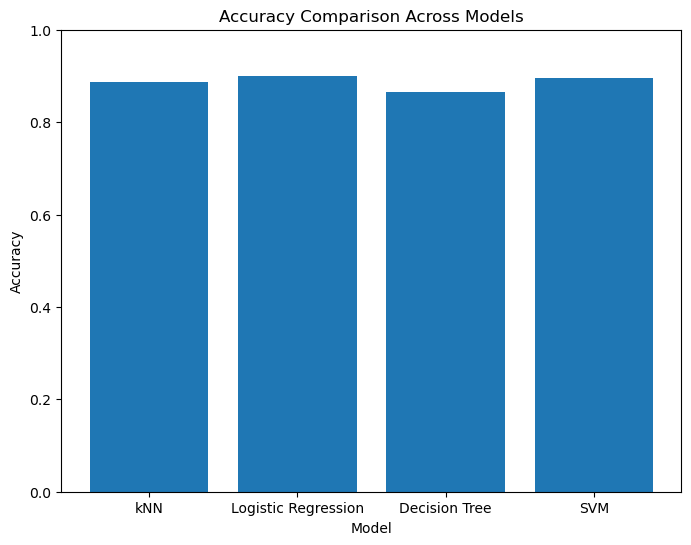

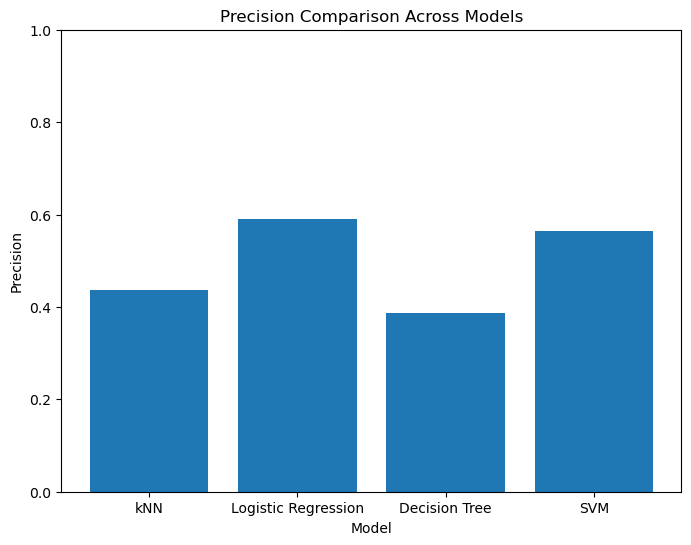

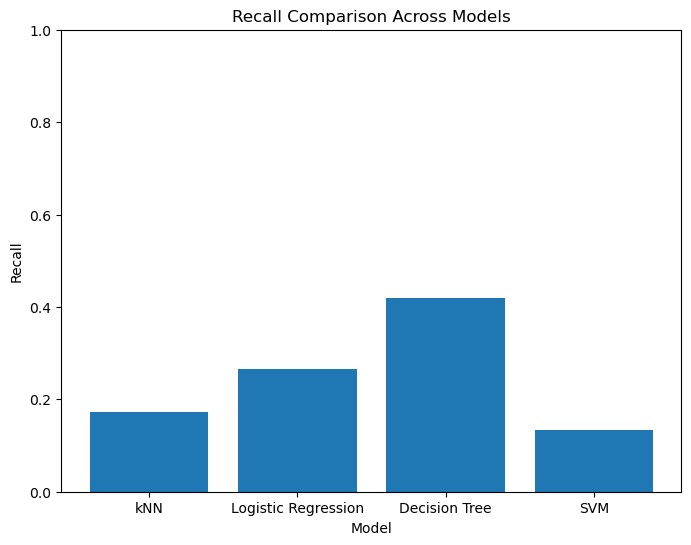

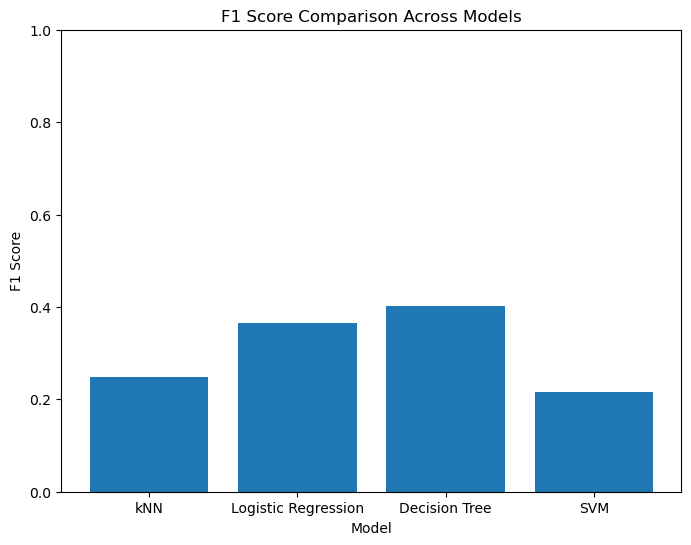

In [63]:
import matplotlib.pyplot as plt

# List of metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot each metric in a separate bar chart
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(results_df.index, results_df[metric])
    plt.title(f"{metric} Comparison Across Models")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()

# Summary of model suitability

# Actionable Insights:

# Next Steps:

# Recommendations:

In [ ]:
# Sumamary of descriptive statistics

In [67]:
# Calculate mean, median, and mode for continuous variables
continuous_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
mean_values = data[continuous_vars].mean()
median_values = data[continuous_vars].median()
mode_values = data[continuous_vars].mode().iloc[0]

# Compile results into a DataFrame
descriptive_summary = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

descriptive_summary

,Mean,Median,Mode
age,41.170095,39.0,34
balance,1422.657819,444.0,0
duration,263.961292,185.0,123
campaign,2.793630,2.0,1
pdays,39.766645,-1.0,-1
previous,0.542579,0.0,0


# Overall summary

The summary indicates several key customer segments:

Age and Balance. Customers span a wide age range and balance levels, with a notable segment at age 34 and zero balance. Targeted messaging could be created for different age groups and financial engagement levels.
Contact Patterns. Most customers are new contacts, contacted once, and have brief call durations. Increasing call duration and follow-up rates selectively, particularly with those who have shown past interest, could improve campaign effectiveness.